In [57]:
import numpy as np
import pandas as pd

In [58]:
df1 = pd.read_csv('undersampled_train_dataset.csv')

In [59]:
df1.drop(columns=['freq_qid1', 'freq_qid2', 'freq_sum', 'freq_diff'])

,q1len,q2len,q1_words,q2_words,q1_characters,q2_characters,q1_u_words,q2_u_words,q1_u_words_wo_sw,q2_u_words_wo_sw,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio,is_duplicate
0,42,120,9,21,17,23,9,19,5,8,...,0,0,12,15.0,30,31,27,34,0.139535,0
1,33,23,7,4,16,15,7,4,5,4,...,0,1,3,5.5,59,70,59,81,0.458333,0
2,81,48,14,8,25,17,14,8,11,6,...,0,0,6,11.0,11,31,32,46,0.142857,0
3,18,123,5,33,15,28,5,17,7,20,...,0,0,28,19.0,17,44,14,40,0.105263,0
4,53,75,9,15,19,21,9,14,6,7,...,0,1,6,12.0,37,40,34,39,0.092593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215273,63,54,11,8,20,21,11,8,6,7,...,1,0,3,9.5,77,74,80,87,0.436364,1
215274,77,74,16,14,23,24,16,14,8,7,...,0,0,2,15.0,52,53,81,86,0.253333,1
215275,36,40,7,9,17,18,7,9,4,4,...,1,1,2,8.0,70,64,84,85,0.324324,1
215276,77,98,13,16,23,24,13,16,10,13,...,0,1,3,14.5,88,100,88,100,0.987179,1


In [60]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(how="any", inplace=True)

In [61]:
dataset_1 = df1.values

In [62]:
X_1 = dataset_1[:, :-1]
Y_1 = dataset_1[:, -1:]

In [63]:
from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(X_1, Y_1, test_size = 0.2, random_state = 42)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_1)

X_train_std_1 = scaler.transform(X_train_1)
Y_train_1 = Y_train_1.ravel()

X_valid_std_1 = scaler.transform(X_valid_1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

In [39]:
np.arange(1, 20, 3)

array([ 1,  4,  7, 10, 13, 16, 19])

In [40]:
clf = KNeighborsClassifier()

param_range = np.arange(1, 20, 3)
param_name="n_neighbors"
cv = 5

def cross_validate(scoring):
    train_scores, valid_scores = validation_curve(
        clf, X_train_std_1, Y_train_1, param_name=param_name, param_range=param_range,
        scoring=scoring,
        cv=cv,
        n_jobs=1,
        error_score="raise")
    
    print(train_scores)
    print(valid_scores)
    plot(scoring, train_scores, valid_scores)

In [41]:
import matplotlib.pyplot as plt

def plot(scoring, train_scores, valid_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    
    print(train_scores_mean)
    
    plt.title("Validation Curve with KNN")
    plt.xlabel("n_neighbors")
    plt.ylabel(scoring)
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(
        param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.semilogx(
        param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.show()

In [42]:
cross_validate('precision')

KeyboardInterrupt: 

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

In [68]:
clf2 = KNeighborsClassifier(n_neighbors=4)

In [69]:
clf2.fit(X_train_std_1, Y_train_1)
y_pred_1 = clf2.predict(X_valid_std_1)

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

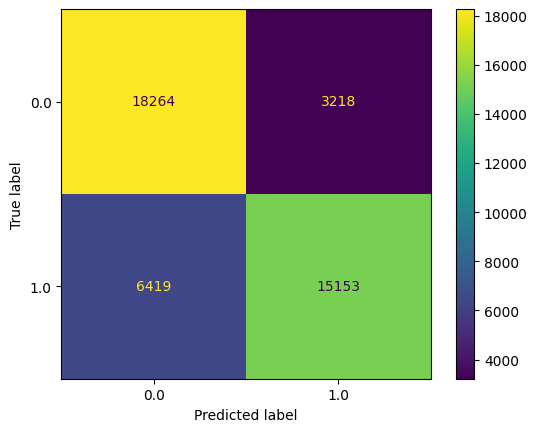

In [71]:
ConfusionMatrixDisplay.from_predictions(Y_valid_1, y_pred_1)
plt.show()

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_valid_1, y_pred_1).ravel()
print(confusion_matrix(Y_valid_1, y_pred_1))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_valid_1, y_pred_1))

[[18264  3218]
 [ 6419 15153]]
TN: 18264, FP: 3218, FN: 6419, TP: 15153
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79     21482
         1.0       0.82      0.70      0.76     21572

    accuracy                           0.78     43054
   macro avg       0.78      0.78      0.77     43054
weighted avg       0.78      0.78      0.77     43054



In [73]:
df_test_1 = pd.read_csv('undersampled_test_dataset.csv')
df_test_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test_1.dropna(how="any", inplace=True)

In [74]:
dataset_test_1 = df_test_1.values

In [75]:
X_test_1 = dataset_test_1[:, :-1]
Y_test_1 = dataset_test_1[:, -1:]

In [76]:
X_test_std_1 = scaler.transform(X_test_1)

In [77]:
y_test_pred_1 = clf2.predict(X_test_std_1)

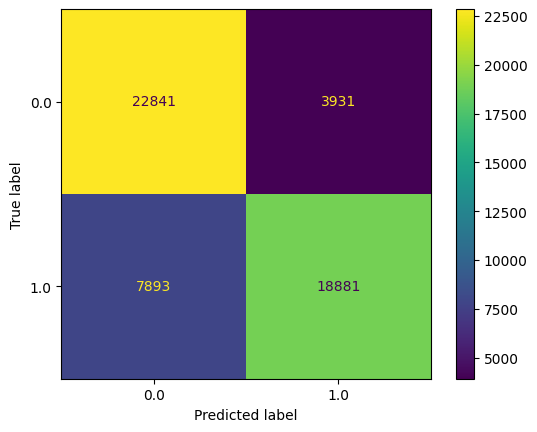

In [78]:
ConfusionMatrixDisplay.from_predictions(Y_test_1, y_test_pred_1)
plt.show()

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test_1, y_test_pred_1).ravel()
print(confusion_matrix(Y_test_1, y_test_pred_1))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_test_1, y_test_pred_1))

[[22841  3931]
 [ 7893 18881]]
TN: 22841, FP: 3931, FN: 7893, TP: 18881
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79     26772
         1.0       0.83      0.71      0.76     26774

    accuracy                           0.78     53546
   macro avg       0.79      0.78      0.78     53546
weighted avg       0.79      0.78      0.78     53546



In [80]:
# # Features from rfe (features = 20)
# features = ['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'chebyshev', 'braycurtis',
#        'canberra', 'cityblock', 'word_mover_distance', 'skew_q1', 'skew_q2',
#        'kurtosis_q2', 'cwc_min', 'cwc_max', 'csc_max', 'ctc_max',
#        'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio',
#        'longest_substr_ratio', 'is_duplicate']

In [81]:
# df2 = pd.read_csv('undersampled_train_dataset.csv', usecols=features)
# df2.replace([np.inf, -np.inf], np.nan, inplace=True)
# df2.dropna(how="any", inplace=True)

In [82]:
# dataset2 = df2.values
# X2 = dataset2[:, :-1]
# Y2 = dataset2[:, -1:]

# X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

In [83]:
# scaler = StandardScaler()
# scaler.fit(X_train_2)

# X_train_std_2 = scaler.transform(X_train_2)
# Y_train_2 = Y_train_2.ravel()

# X_valid_std_2 = scaler.transform(X_valid_2)

In [84]:
# clf = DecisionTreeClassifier()
# clf.fit(X_train_std_2, Y_train_2)
# y_pred_2 = clf.predict(X_valid_std_2)

In [85]:
# ConfusionMatrixDisplay.from_predictions(Y_valid_2, y_pred_2)
# plt.show()

In [86]:
# from sklearn.metrics import classification_report, confusion_matrix
# tn, fp, fn, tp = confusion_matrix(Y_valid_2, y_pred_2).ravel()
# print(confusion_matrix(Y_valid_2, y_pred_2))
# print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
# print(classification_report(Y_valid_2, y_pred_2))

In [87]:
# df_test_2 = pd.read_csv('undersampled_test_dataset.csv', usecols=features)
# df_test_2.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_test_2.dropna(how="any", inplace=True)

In [88]:
# dataset_test_2 = df_test_2.values

In [89]:
# X_test_2 = dataset_test_2[:, :-1]
# Y_test_2 = dataset_test_2[:, -1:]

In [90]:
# X_test_std_2 = scaler.transform(X_test_2)
# y_test_pred_2 = clf.predict(X_test_std_2)

In [91]:
# ConfusionMatrixDisplay.from_predictions(Y_test_2, y_test_pred_2)
# plt.show()

In [92]:
# from sklearn.metrics import classification_report, confusion_matrix
# tn, fp, fn, tp = confusion_matrix(Y_test_2, y_test_pred_2).ravel()
# print(confusion_matrix(Y_test_2, y_test_pred_2))
# print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
# print(classification_report(Y_test_2, y_test_pred_2))

In [93]:
df_feat = pd.read_csv('combined_features.csv')

In [94]:
df_feat[34187:34188]

,freq_qid1,freq_qid2,q1len,q2len,q1_words,q2_words,q1_characters,q2_characters,q1_u_words,q2_u_words,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio,is_duplicate
34187,1,1,54,46,13,11,20,22,12,10,...,0,0,2,12.0,43,57,80,91,0.382979,1


In [95]:
vim = df_feat[34187:34188].values[:, :-1]
vim = scaler.transform(vim)
vim

array([[-0.46565673, -0.43586119, -0.14527958, -0.39411465,  0.43487544,
         0.01301892,  0.16847875,  0.76797944,  0.37966961, -0.08616056,
        -0.09016169, -0.09791287, -0.10838116,  0.42520859,  0.24283191,
         0.16215281, -0.48883486, -0.35835508, -0.50505636, -0.52383704,
        -0.6515618 ,  0.65156628, -0.25160462, -0.66810044, -0.64314985,
        -0.61607422, -0.66205335, -0.71477925, -0.49037103, -0.93518483,
         0.48233115,  0.84561394, -0.05070812, -0.03018268,  0.24306708,
         0.42174803,  0.06538625,  0.18101297, -0.72029502, -1.04013347,
        -0.31753758,  0.24284059, -0.82885766, -0.48403687,  0.85552373,
         0.87466339, -0.06550462]])

In [96]:
clf2.predict(vim)

array([1.])